In [1]:
import torch
if(torch.cuda.is_available()):
    print("YES")
else:
    print("NO")

c:\Users\Windows\.conda\envs\yolo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


YES


In [3]:
import numpy as np

import matplotlib.pyplot as plt 

import keras 

import cv2 

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [3]:
(x_train, y_train) ,(x_test, y_test)=mnist.load_data()

In [4]:
def plot_input_img(i):
  plt.imshow(x_train[20], cmap='binary')
  plt.title(y_train[i])
  plt.show()

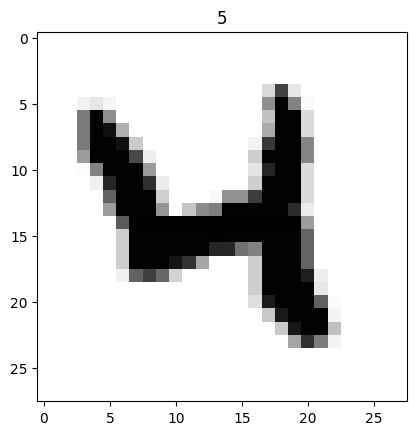

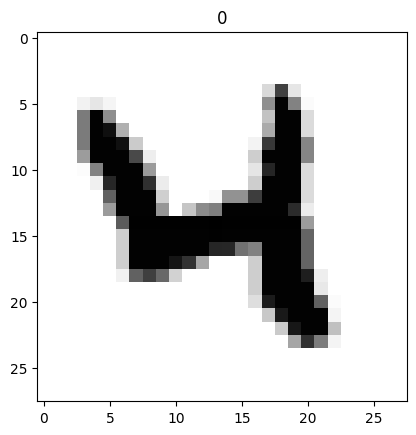

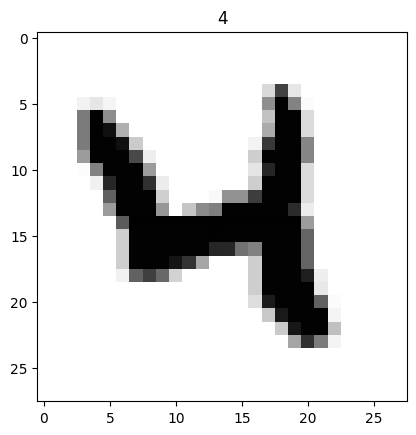

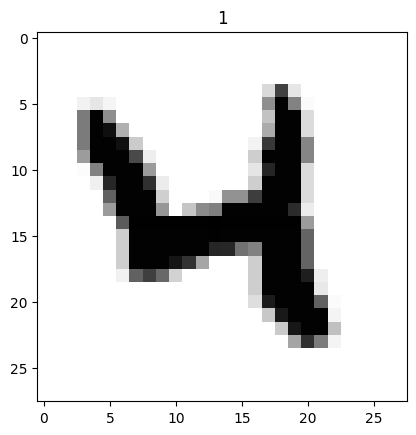

In [16]:
for i in range(4):
  plot_input_img(i)

In [5]:
# Preprocesing images
# Normalizing image [0,1]
x_train = x_train.astype(np.float32)/255

x_test = x_test.astype(np.float32)/255

# Reshape / expand the dimensions od imagees to (28,28,1)
x_train = np.expand_dims(x_train, -1)

#y_train = np.expand_dims(y_train, -1)

x_test = np.expand_dims(x_test, -1)

#y_test = np.expand_dims(y_test, -1)

# Convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)

y_test = keras.utils.to_categorical(y_test)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
y_train.shape

(60000, 10)

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(64, (3,3), input_shape = (28,28,1), activation = "relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [11]:
# Callbacks 

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping

es = EarlyStopping(monitor='val_acc', min_delta =0.01, patience = 4, verbose = 1)

# Model Check Point

mc = ModelCheckpoint("./bestmodel.h5", monitor="val_accuracy",
                     verbose =1, save_best_only = True)

cb= [es,mc]

In [61]:
his = model.fit(x_train,y_train, epochs = 50, validation_split = 0.3, callbacks = cb)

Epoch 1/50
1310/1313 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9902WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_accuracy improved from -inf to 0.98756, saving model to .\bestmodel.h5
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0416 - val_accuracy: 0.9876
Epoch 2/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0267 - accuracy: 0.9910WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_accuracy improved from 0.98756 to 0.98867, saving model to .\bestmodel.h5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0267 - accuracy: 0.9910 - val_loss: 0.0393 - val_accuracy: 0.9887
Epoch 3/50
1311/1313 [============================>.] - ETA: 0s -

In [13]:
model_s = keras.models.load_model("C://Users//Windows//Desktop//MEGATREND//Building_API//bestmodel.h5")

1/1 [==============================] - 0s 134ms/step
Predikcija za učitani broj je 4


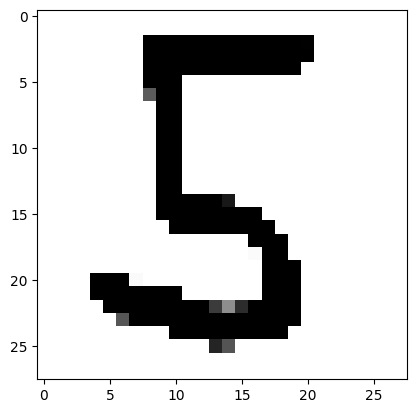

In [14]:
import cv2
neka_moja_slika=r"C://Users//Windows//Desktop//MEGATREND//Building_API//nula.png"

test_image = cv2.imread(neka_moja_slika,cv2.IMREAD_GRAYSCALE)

test_image = cv2.resize(test_image,(28,28), interpolation = cv2.INTER_LINEAR)
# test_image = cv2.bitwise_not(neka_moja_slika)

image_index = 222
plt.imshow(test_image.reshape(28, 28),cmap='gray')
pred = model_s.predict(test_image.reshape(1, 28, 28, 1))
print("Predikcija za učitani broj je", pred.argmax())



In [18]:
x_test[0].shape

(28, 28, 1)